In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import folium
#import zipfile
import datetime as dt
from datetime import datetime

In [2]:
winters_attribution_df = pd.read_excel("WM+Winters+Attribution+Data.xlsx")

In [3]:
winters_attribution_df.head(10)

,Orderid,Orderdatetime,Saleamount,Newcustomer,Position,Positiondatetime,Groupname,Networkname,Networkid,Brand,Positionname,Orderdatetime.1,Positiontime,Time to Convert (Days)
0,11634052,2012-05-01 04:24:00,341.50,Y,1,2012-05-01 03:49:00,BUZZ AFFILIATE,Buzz CPA Affiliate,buzz23,N,CONVERTER,2012-05-01 04:24:00,2012-05-01 03:49:00,0
1,11634052,2012-05-01 04:24:00,341.50,Y,0,2012-05-01 03:47:00,SEARCH GOOGLE BRAND,G: Medifast Brand Terms > Medifast >,g000793,Y,ORIGINATOR,2012-05-01 04:24:00,2012-05-01 03:47:00,0
2,11634059,2012-05-01 04:08:00,339.00,Y,2,2012-04-29 21:01:00,PRINT - MAGAZINES,Medifastok.com,medifastok.com,N,CONVERTER,2012-05-01 04:08:00,2012-04-29 21:01:00,2
3,11634059,2012-05-01 04:08:00,339.00,Y,1,2012-04-24 05:29:00,CPM,Armonix,nar7467,N,ASSIST,2012-05-01 04:08:00,2012-04-24 05:29:00,7
4,11634059,2012-05-01 04:08:00,339.00,Y,0,2012-04-23 02:46:00,PRINT - MAGAZINES,Medifastok.com,medifastok.com,N,ORIGINATOR,2012-05-01 04:08:00,2012-04-23 02:46:00,8
5,11634060,2012-05-01 04:04:00,101.79,N,7,2012-04-29 23:06:00,CPM,Adroll - adr,adr,N,CONVERTER,2012-05-01 04:04:00,2012-04-29 23:06:00,2
6,11634060,2012-05-01 04:04:00,101.79,N,6,2012-04-29 23:05:00,CPM,Adroll - adr,adr,N,ASSIST,2012-05-01 04:04:00,2012-04-29 23:05:00,2
7,11634060,2012-05-01 04:04:00,101.79,N,5,2012-04-29 22:57:00,CPM,Adroll - adr,adr,N,ROSTER,2012-05-01 04:04:00,2012-04-29 22:57:00,2
8,11634060,2012-05-01 04:04:00,101.79,N,4,2012-04-29 21:43:00,CPM,Accordant,n6899541,N,ROSTER,2012-05-01 04:04:00,2012-04-29 21:43:00,2
9,11634060,2012-05-01 04:04:00,101.79,N,3,2012-04-29 21:38:00,CPM,Accordant,n6899541,N,ROSTER,2012-05-01 04:04:00,2012-04-29 21:38:00,2


In [14]:
winters_attribution_df.groupby(['Positionname','Groupname']).count()

# look @ counts for positionname w/ groupname
# look @ counts for first touch / last touch
# invest in ppl who consistency get ppl that go through the entire flow
# counts for each step and determine % of overall and volume
# time to convert averages by groupname
# average saleamount by groupname

Orderid  Orderdatetime  Saleamount  \
Positionname Groupname                                                     
ASSIST       BUZZ AFFILIATE               333            333         333   
             CJ                           127            127         127   
             CPM                         1070           1070        1070   
             OTHER                          4              4           4   
             PRINT - MAGAZINES              2              2           2   
             SEARCH GOOGLE BRAND          126            126         126   
             SEARCH GOOGLE NON-BRAND       11             11          11   
             SEARCH MSN BRAND              17             17          17   
             SEARCH MSN NON-BRAND           1              1           1   
             TV                             8              8           8   
             Uncategorized                 16             16          16   
CONVERTER    BUZZ AFFILIATE               632            632         632   
             CJ                           312            312         312   
             CPM                         1112           1112        1112   
             OTHER                          5              5           5   
             PRINT - MAGAZINES              5              5           5   
             SEARCH GOOGLE NON-BRAND       42             42          42   
             SEARCH MSN NON-BRAND           7              7           7   
             TV                            25             25          25   
             Uncategorized                 30             30          30   
ORIGINATOR   BUZZ AFFILIATE               287            287         287   
             CJ                           107            107         107   
             CPM                          812            812         812   
             DIRECT MAIL                    1              1           1   
             OTHER                         24             24          24   
             PRINT - MAGAZINES              4              4           4   
             SEARCH GOOGLE BRAND          662            662         662   
             SEARCH GOOGLE NON-BRAND       65             65          65   
             SEARCH MSN BRAND             163            163         163   
             SEARCH MSN NON-BRAND           7              7           7   
             SEARCH YAHOO BRAND             1              1           1   
             Social                         2              2           2   
             TV                            20             20          20   
             Uncategorized                 14             14          14   
ROSTER       BUZZ AFFILIATE               557            557         557   
             CJ                           162            162         162   
             CPM                         2909           2909        2909   
             OTHER                         13             13          13   
             PRINT - MAGAZINES              4              4           4   
             SEARCH GOOGLE BRAND          294            294         294   
             SEARCH GOOGLE NON-BRAND       18             18          18   
             SEARCH MSN BRAND              58             58          58   
             SEARCH MSN NON-BRAND           3              3           3   
             SEARCH YAHOO BRAND             2              2           2   
             Social                         1              1           1   
             TV                            17             17          17   
             Uncategorized                 27             27          27   

                                      Newcustomer  Position  Positiondatetime  \
Positionname Groupname                                                          
ASSIST       BUZZ AFFILIATE                   333       333               333   
             CJ                               127       127           

In [16]:
first_touch_df = winters_attribution_df[winters_attribution_df['Positionname'] == 'ORIGINATOR']
last_touch_df = winters_attribution_df[winters_attribution_df['Positionname'] == 'CONVERTER']

In [38]:
first_touch_stats = first_touch_df.groupby('Groupname', as_index = False).agg({'Saleamount': ['mean', 'max', 'min', 'sum'], 
                                                           'Orderid': 'count', 'Time to Convert (Days)': 'mean'}).sort_values(by=[('Orderid', 'count')], ascending = False)

In [41]:
first_touch_stats

Groupname Orderid Time to Convert (Days)  Saleamount  \
                              count                   mean        mean   
2                       CPM     812               2.413793  236.768448   
6       SEARCH GOOGLE BRAND     662              24.388218  246.568293   
0            BUZZ AFFILIATE     287              19.111498  254.439303   
8          SEARCH MSN BRAND     163              24.877301  239.450982   
1                        CJ     107              20.897196  253.507944   
7   SEARCH GOOGLE NON-BRAND      65              19.415385  237.522923   
4                     OTHER      24              62.625000  231.481250   
12                       TV      20              11.800000  242.893000   
13            Uncategorized      14              39.500000  202.229286   
9      SEARCH MSN NON-BRAND       7               1.428571  253.770000   
5         PRINT - MAGAZINES       4              14.250000  262.977500   
11                   Social       2               0.000000  363.040000   
3               DIRECT MAIL       1              35.000000  170.980000   
10       SEARCH YAHOO BRAND       1             153.000000  258.490000   

                                
        max     min        sum  
2   1402.09   19.09  192255.98  
6    777.91   40.05  163228.21  
0    683.00   58.97   73024.08  
8   1197.95   25.67   39030.51  
1    687.93   76.69   27125.35  
7    441.99   68.74   15438.99  
4    426.37   47.58    5555.55  
12   495.00   43.64    4857.86  
13   354.95   42.10    2831.21  
9    399.70   42.52    1776.39  
5    373.90   77.95    1051.91  
11   561.08  165.00     726.08  
3    170.98  170.98     170.98  
10   258.49  258.49     258.49

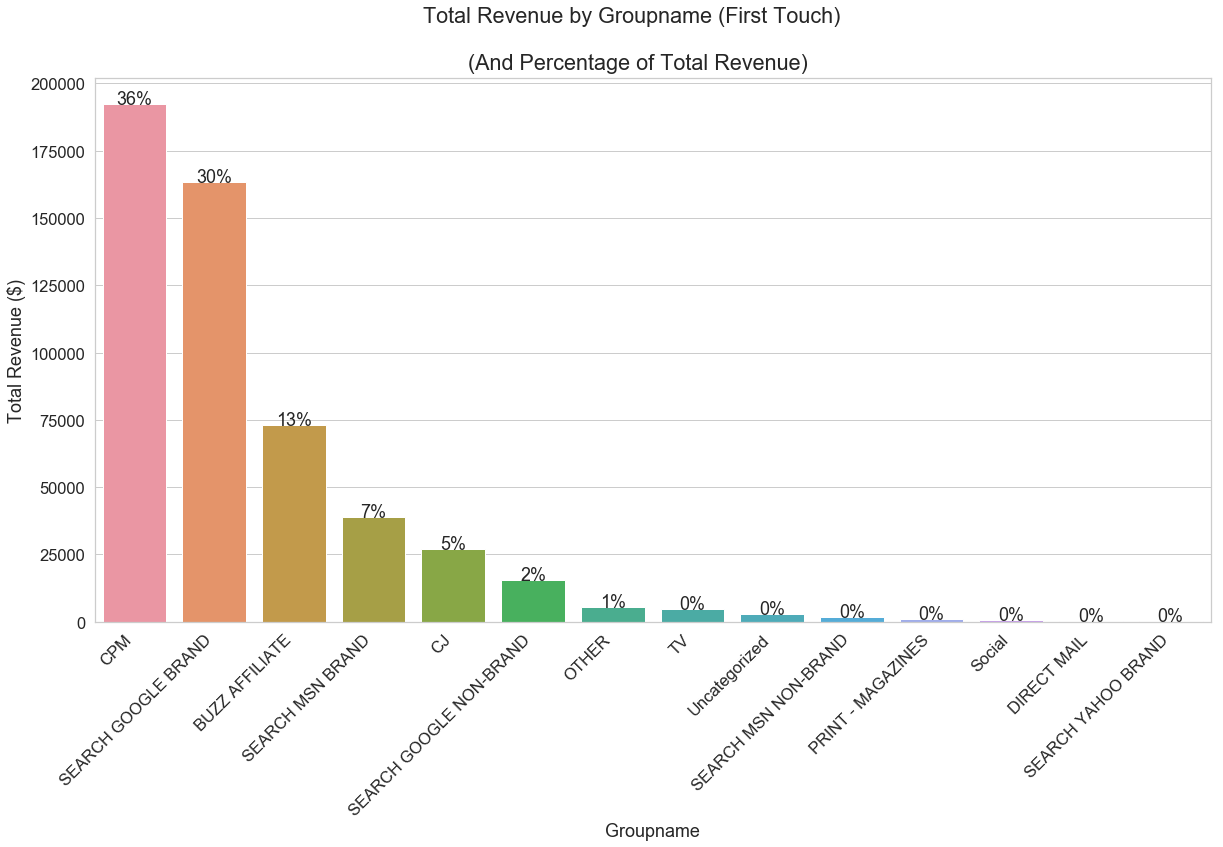

In [156]:
#xlabels = first_touch_stats[('Orderid', 'count')]
#xlabels2 = first_touch_stats[('Time to Convert (Days)', 'mean')]
total = sum(first_touch_stats[('Saleamount','sum')])

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x = 'Groupname', y = ('Saleamount','sum'), data = first_touch_stats, ax = ax)
plt.xticks(rotation = 45 )
plt.suptitle('Total Revenue by Groupname (First Touch) \n\n (And Percentage of Total Revenue)')
plt.ylabel('Total Revenue ($)')
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{}%'.format(int(height/total*100)),
            ha="center") 

plt.show()

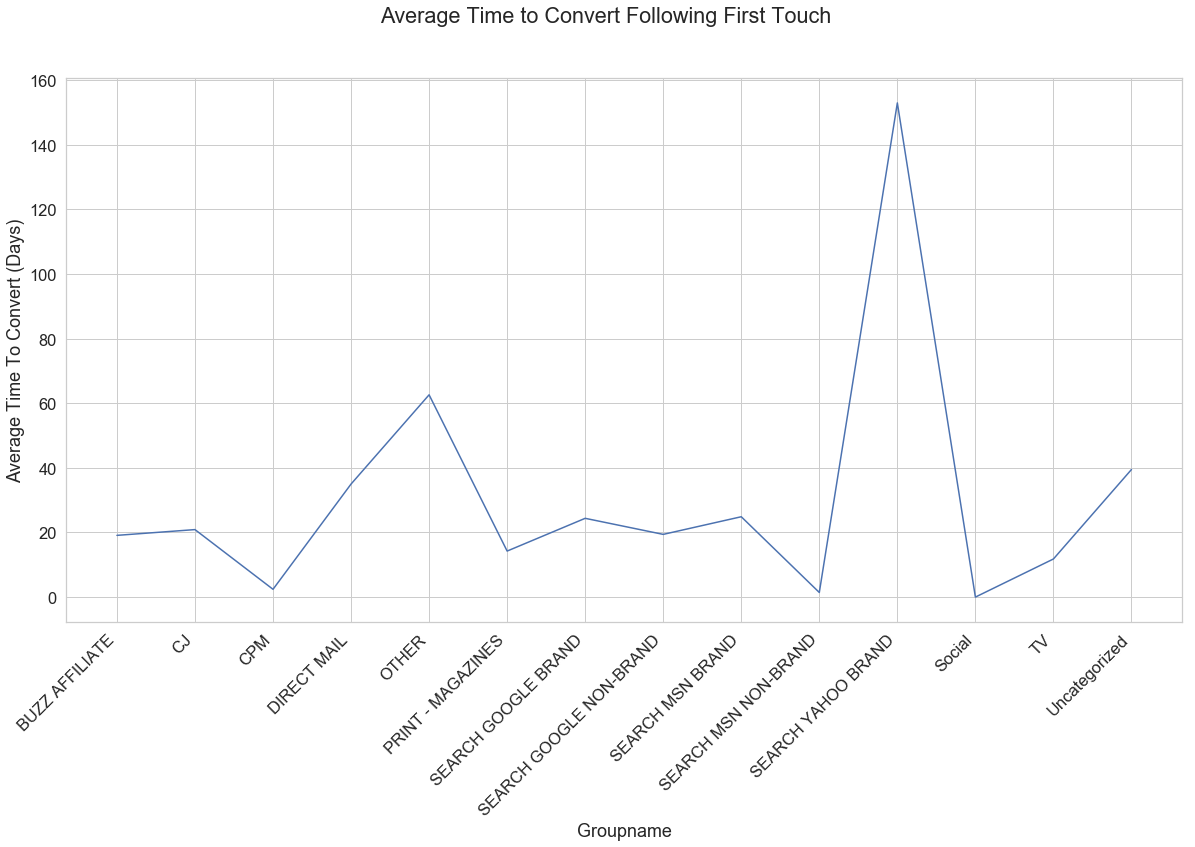

In [166]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x = 'Groupname', y = ('Time to Convert (Days)','mean'), data = first_touch_stats, ax = ax)
plt.xticks(rotation = 45 )
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.suptitle('Average Time to Convert Following First Touch')
plt.ylabel('Average Time To Convert (Days)')

plt.show()

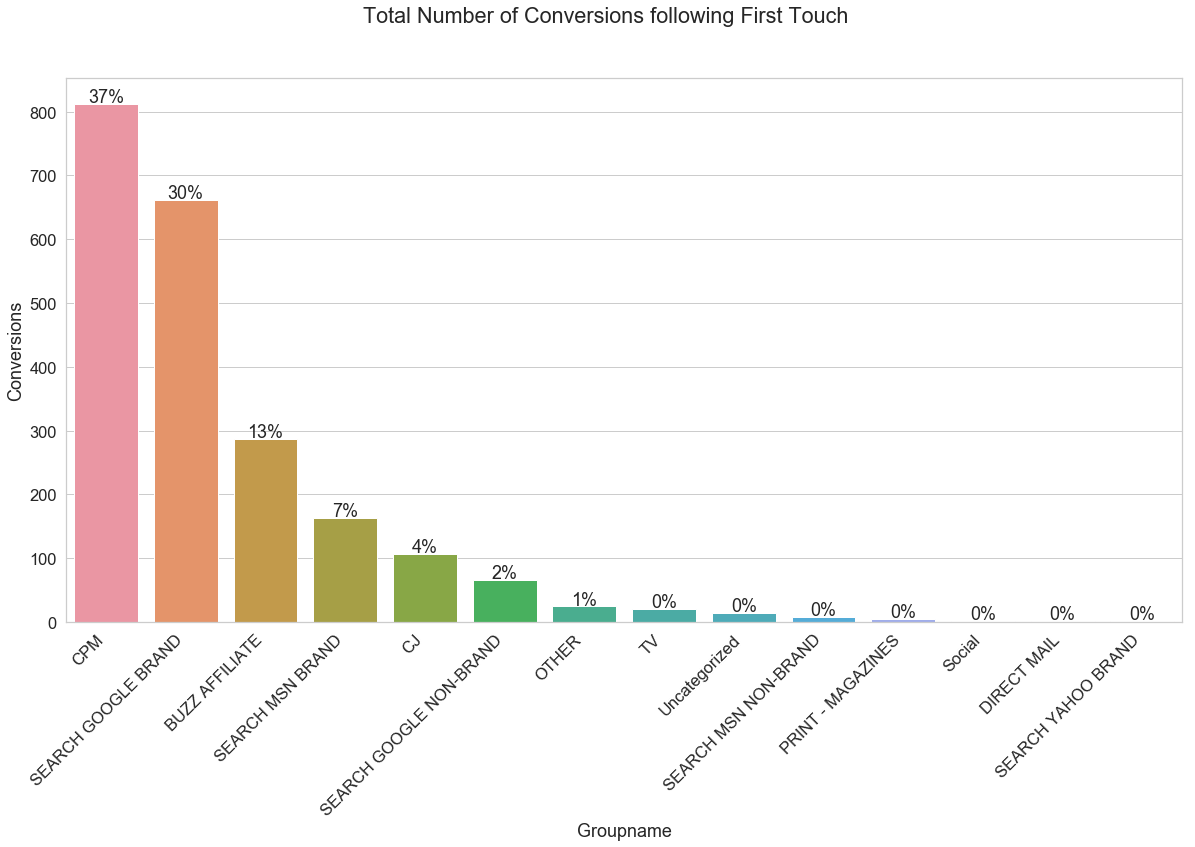

In [170]:
total = sum(first_touch_stats[('Orderid','count')])

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x = 'Groupname', y = ('Orderid','count'), data = first_touch_stats, ax = ax)
plt.xticks(rotation = 45 )
plt.suptitle('Total Number of Conversions following First Touch')
plt.ylabel('Conversions')
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{}%'.format(int(height/total*100)),
            ha="center")

plt.show()

In [171]:
last_touch_stats = last_touch_df.groupby('Groupname', as_index = False).agg({'Saleamount': ['mean', 'max', 'min', 'sum'], 
                                                           'Orderid': 'count', 'Time to Convert (Days)': 'mean'}).sort_values(by=[('Orderid', 'count')], ascending = False)

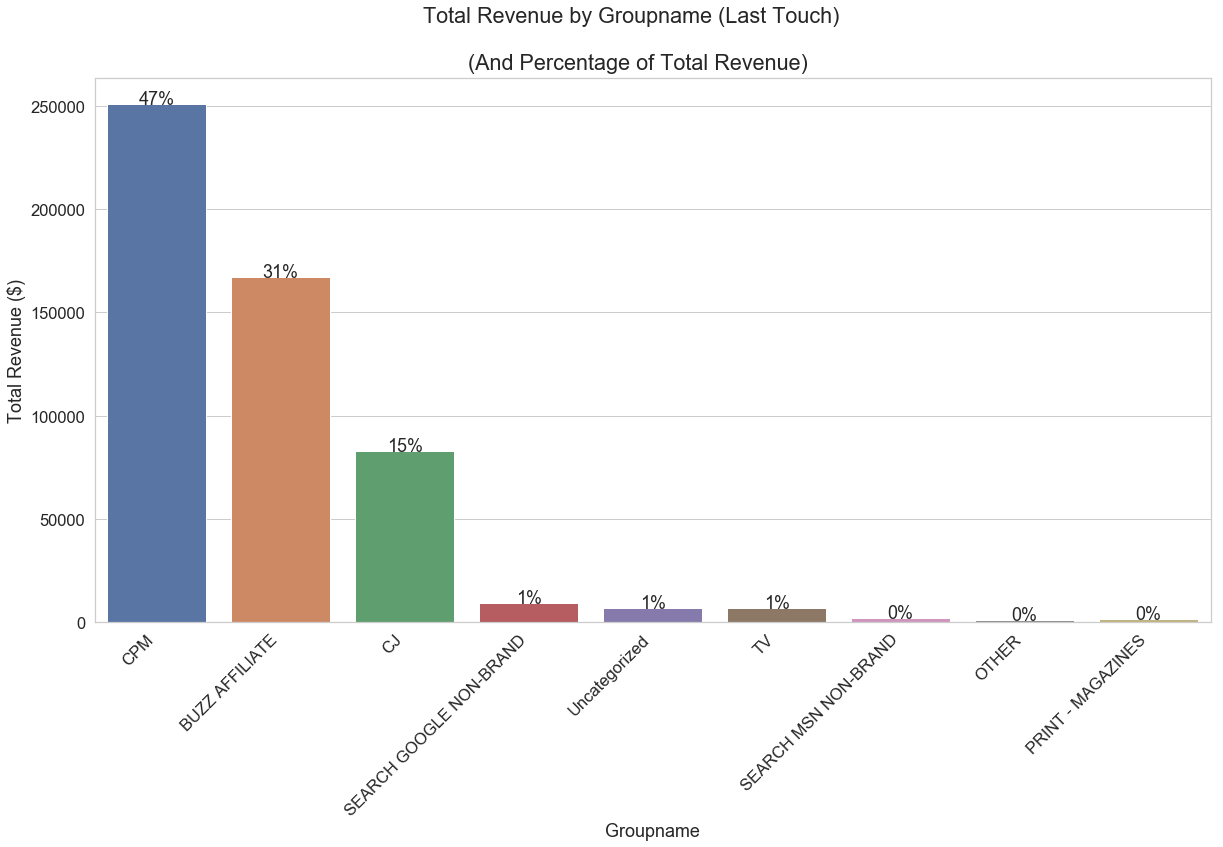

In [172]:
total = sum(last_touch_stats[('Saleamount','sum')])

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x = 'Groupname', y = ('Saleamount','sum'), data = last_touch_stats, ax = ax)
plt.xticks(rotation = 45 )
plt.suptitle('Total Revenue by Groupname (Last Touch) \n\n (And Percentage of Total Revenue)')
plt.ylabel('Total Revenue ($)')
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{}%'.format(int(height/total*100)),
            ha="center") 

plt.show()

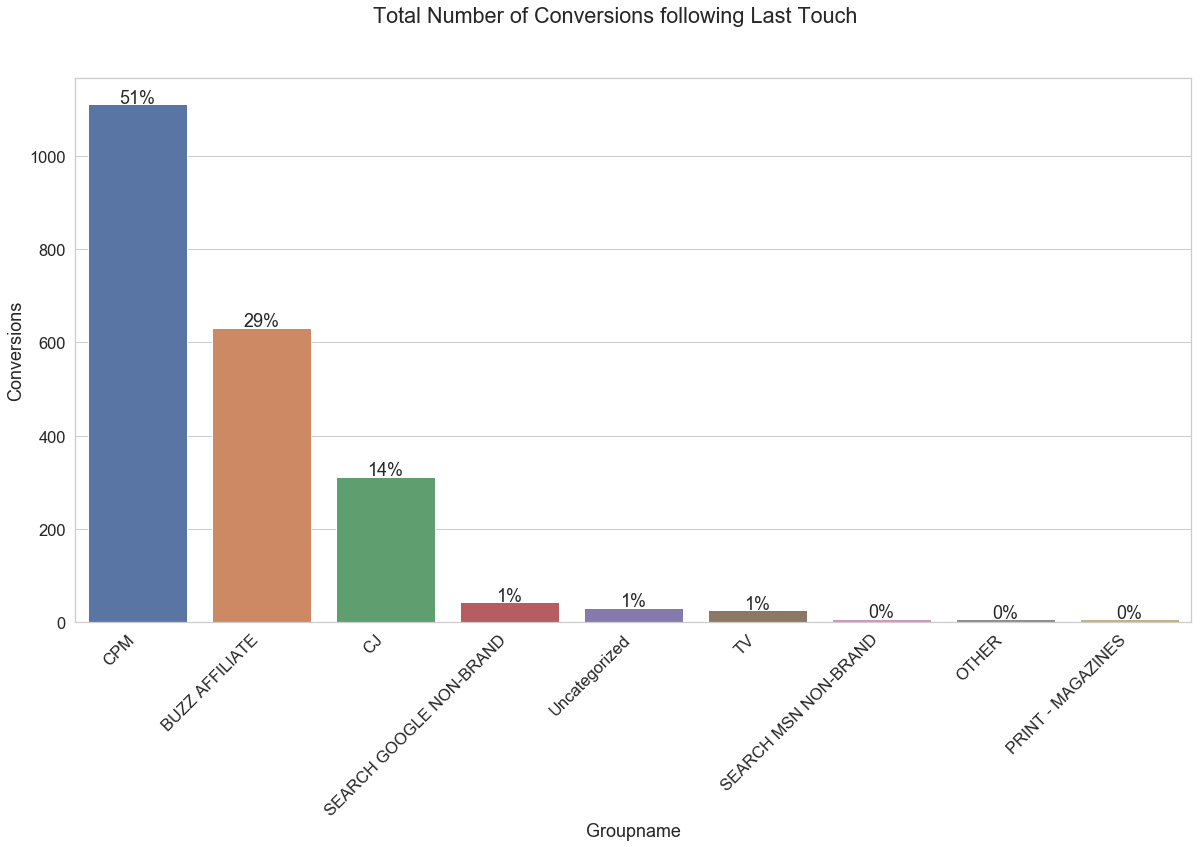

In [174]:
total = sum(last_touch_stats[('Orderid','count')])

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x = 'Groupname', y = ('Orderid','count'), data = last_touch_stats, ax = ax)
plt.xticks(rotation = 45 )
plt.suptitle('Total Number of Conversions following Last Touch')
plt.ylabel('Conversions')
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{}%'.format(int(height/total*100)),
            ha="center")

plt.show()

In [175]:
last_touch_stats

Groupname Orderid Time to Convert (Days)  Saleamount  \
                             count                   mean        mean   
2                      CPM    1112               6.830935  225.690018   
0           BUZZ AFFILIATE     632               1.042722  264.797168   
1                       CJ     312               1.057692  264.965962   
5  SEARCH GOOGLE NON-BRAND      42               2.690476  213.971190   
8            Uncategorized      30               7.066667  224.042000   
7                       TV      25               1.840000  266.306400   
6     SEARCH MSN NON-BRAND       7              19.000000  258.738571   
3                    OTHER       5              26.600000  172.858000   
4        PRINT - MAGAZINES       5               0.400000  277.714000   

                               
       max     min        sum  
2  1402.09   20.34  250967.30  
0  1197.95   33.09  167351.81  
1   630.00   39.14   82669.38  
5   399.15   19.09    8986.79  
8   424.00   75.16    6721.26  
7   434.79   25.22    6657.66  
6   344.48  146.64    1811.17  
3   330.00   93.61     864.29  
4   339.00  175.07    1388.57

In [165]:
last_touch_stats = last_touch_df.groupby('Groupname', as_index = False).agg({'Saleamount': ['mean', 'max', 'min', 'sum'], 
                                                           'Orderid': 'count', 'Time to Convert (Days)': 'mean'}).sort_values(by=[('Orderid', 'count')], ascending = False)